# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ Data corresponding to charges is skewed to the left and does not appear to be normaly distributed. Hence, using statistic such as mean and standard deviation to describe the given sample data is not appropriate 

Text(0, 0.5, 'frequency')

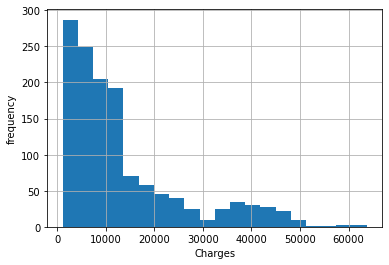

In [4]:
medical.charges.hist(bins=20)
plt.xlabel('Charges')
plt.ylabel('frequency')

In [5]:
charges_mean = medical.charges.mean()
charges_std = medical.charges.std()

In [6]:
charges_mean

13270.422265141257

In [7]:
charges_std

12110.011236693994

In [8]:
len(medical.charges)

1338

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Since the data obtained was randomly sampled from the population, we could perform a t test wherein **our null hypothesis is that the population mean is equal to 12,000**. Hence, **the alternate hypothesis is that the population mean is less than 12,000 respectively**. t test is appropriate in this case since we do not know the population standard deviation. Using the t statstic one could estimate the probability of obtaining a sample mean as extreme as the one observed in the data given null hypothesis being true. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Since our alternate hypothesis is that the population mean is less than 12,000, a ***one-sided*** interval would be most appropriate to use 

In [9]:
# Calculation of the critical value
cri_val = t.ppf(q = 0.95, df=len(medical.charges)-1) # I used q = 0.95 since it is a one sided test 

In [14]:
cri_val

1.6459941145571317

In [11]:
sigma = charges_std/np.sqrt(len(medical.charges))

In [12]:
margin_of_error = cri_val*sigma

In [13]:
confidence_interval = charges_mean - margin_of_error
confidence_interval 

12725.48718381623

__A__: Since the lower bound of the confidence interval is greater than 12,000, there is not enough sufficient evidence to beleive that the population mean has decreased below 12,000. Hence, the administrator need not be concerned

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Our null hypothesis here is that the means of the two population (charges with insurance claim vs. charges without insurance claim) are equal. Therefore, our alternate hypothesis is that the means of the two population are not the same. In our sample, we have 555 data points corresponding to patients without insurance claim and 783 data points corresponding to patients with insurance claim respectively. Based on the formula given above, we are making the assumption that variance of the two population are the same. 

In [57]:
medical[medical.insuranceclaim == 0].shape

(555, 8)

In [58]:
medical[medical.insuranceclaim == 1].shape

(783, 8)

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [63]:
ins_claim = medical.loc[medical.insuranceclaim == 1, 'charges']
mean_ins_claim = ins_claim.mean()
std_ins_claim = ins_claim.std()
n_ins_claim = len(ins_claim)

In [64]:
n_ins_claim

783

In [65]:
no_ins_claim = medical.loc[medical.insuranceclaim == 0, 'charges']
mean_no_ins_claim = no_ins_claim.mean()
std_no_ins_claim = no_ins_claim.std()
n_no_ins_claim = len(no_ins_claim)

In [66]:
pooled_std = np.sqrt((((n_ins_claim - 1)*std_ins_claim**2)+((n_no_ins_claim - 1)*std_no_ins_claim**2))/(n_ins_claim + n_no_ins_claim - 2))

In [67]:
t = (mean_no_ins_claim - mean_ins_claim)/(pooled_std*np.sqrt((1/n_no_ins_claim)+(1/n_ins_claim)))

In [68]:
t

-11.89329903087671

In [69]:
from scipy import stats

In [70]:
stats.ttest_ind(no_ins_claim, ins_claim)

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

__A__: We get the same value of -11.898 for the test statstic through both manual calculation using the abovementioned formula and using scipy.stats() function. Based on the above analysis wherein the p-value corresponding to t-statistic is 4.46e-31 which is well below our alpha of 0.05, it is extremely unlikely that the population mean of the two distribution are the same. Hence, we reject our null hypothesis which validates out alternate hypothesis. Therefore, we have sufficient evidence to beleive that patients with insurance were charged different amounts than patients without insurance. 

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ I am NOT able to locate similar function for performing z-test from the sample. This is possibly because Z distribution is a normal distribution whereas t distribution is similar to normal distribution with fatter tails. One can therefore use functions corresponding to normal distribution while calculating p values corresponding to z distribution 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test